In [2]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression , RidgeClassifier, Huber
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier , ExtraTreesClassifier , AdaBoostClassifier
from sklearn.model_selection import KFold ,StratifiedKFold
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

In [3]:
dftrain = pd.read_csv('MPP_Dataset/Train.csv')
dftest = pd.read_csv('MPP_Dataset/Test.csv')

In [4]:
dftrain.describe().T

,count,mean,std,min,25%,50%,75%,max
Store_Ratio,18208.0,0.544283,0.202709,0.000000,0.411000,0.573000,0.69900,0.998
Basket_Ratio,18208.0,0.483585,0.302010,0.000216,0.200000,0.517000,0.74200,1.000
Category_1,18208.0,5.155536,3.535068,0.000000,2.000000,5.000000,8.00000,11.000
Store_Score,18208.0,-12.198086,8.370566,-47.576000,-16.496250,-9.166500,-5.94375,-0.079
Category_2,18208.0,0.648506,0.477450,0.000000,0.000000,1.000000,1.00000,1.000
Store_Presence,18208.0,0.477702,0.380634,0.000000,0.086175,0.430000,0.89500,0.996
Score_1,18208.0,0.322109,0.413493,0.000000,0.000001,0.002245,0.85900,1.000
Score_2,18208.0,0.164888,0.136531,0.011900,0.095300,0.112000,0.17600,0.991
Score_3,18208.0,0.421440,0.271922,0.000000,0.184750,0.393000,0.64000,0.999
Score_4,18208.0,115.305776,31.478303,0.000000,90.974250,114.022500,134.99700,219.701


In [5]:
train = pd.read_csv('MPP_Dataset/Train.csv')
test = pd.read_csv('MPP_Dataset/Test.csv')

In [6]:
train.head()
train.popularity = train.popularity.replace(5,2) 

In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Store_Ratio,18208.0,0.544283,0.202709,0.000000,0.411000,0.573000,0.69900,0.998
Basket_Ratio,18208.0,0.483585,0.302010,0.000216,0.200000,0.517000,0.74200,1.000
Category_1,18208.0,5.155536,3.535068,0.000000,2.000000,5.000000,8.00000,11.000
Store_Score,18208.0,-12.198086,8.370566,-47.576000,-16.496250,-9.166500,-5.94375,-0.079
Category_2,18208.0,0.648506,0.477450,0.000000,0.000000,1.000000,1.00000,1.000
Store_Presence,18208.0,0.477702,0.380634,0.000000,0.086175,0.430000,0.89500,0.996
Score_1,18208.0,0.322109,0.413493,0.000000,0.000001,0.002245,0.85900,1.000
Score_2,18208.0,0.164888,0.136531,0.011900,0.095300,0.112000,0.17600,0.991
Score_3,18208.0,0.421440,0.271922,0.000000,0.184750,0.393000,0.64000,0.999
Score_4,18208.0,115.305776,31.478303,0.000000,90.974250,114.022500,134.99700,219.701


In [8]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Store_Ratio,12140.0,0.543776,0.200109,0.000,0.414750,0.57000,0.69600,0.978
Basket_Ratio,12140.0,0.488879,0.301217,0.000,0.213000,0.52100,0.74500,1.000
Category_1,12140.0,5.121417,3.528765,0.000,2.000000,5.00000,8.00000,11.000
Store_Score,12140.0,-12.062847,8.300385,-46.847,-16.066000,-9.04650,-5.89175,0.662
Category_2,12140.0,0.642916,0.479160,0.000,0.000000,1.00000,1.00000,1.000
Store_Presence,12140.0,0.474675,0.377582,0.000,0.087775,0.43050,0.88200,0.996
Score_1,12140.0,0.321641,0.414438,0.000,0.000001,0.00205,0.86100,1.000
Score_2,12140.0,0.165942,0.139109,0.000,0.095900,0.11200,0.17325,0.994
Score_3,12140.0,0.420485,0.270508,0.000,0.190000,0.39200,0.63300,1.000
Score_4,12140.0,115.748041,31.519999,0.000,90.908750,114.61850,135.82925,219.701


In [9]:
# train['Store_Ratio'] = np.sqrt(train['Store_Ratio'])
# test['Store_Ratio'] = np.sqrt(test['Store_Ratio'])

# train['Basket_Ratio'] = np.sqrt(train['Basket_Ratio'])
# test['Basket_Ratio'] = np.sqrt(test['Basket_Ratio'])

# train['Store_Ratio'],fitted_lambda = stats.boxcox(train['Store_Ratio'] + 47.576)
# test['Store_Ratio'] = stats.boxcox((test['Store_Ratio'] + 46.847), fitted_lambda)

# train['Store_Presence'] = np.sqrt(train['Store_Presence'])
# test['Store_Presence'] = np.sqrt(test['Store_Presence'])


# #train['Store_Score'] = np.sqrt(train['Store_Score'])
# #test['Store_Score'] = np.sqrt(test['Store_Score'])

# train['Score_1'] = np.sqrt(train['Score_1'])
# test['Score_1'] = np.sqrt(test['Score_1'])


# train['Score_2'] = np.sqrt(train['Score_2'])
# test['Score_2'] = np.sqrt(test['Score_2'])


# train['Score_3'] = np.sqrt(train['Score_3'])
# test['Score_3'] = np.sqrt(test['Score_3'])


# train['Score_4'] = np.sqrt(train['Score_4'])
# test['Score_4'] = np.sqrt(test['Score_4'])


# train['time'] = np.log1p(train['time'])
# test['time'] = np.log1p(test['time'])


In [10]:
# for column in test.columns:
#   print(column)
#   fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
#   sns.distplot(dftrain[column],ax=ax[0],color="blue")
#   sns.distplot(test[column],ax=ax[1],color="green")
#   plt.show()

In [11]:
def onehotencoder(train,test,cols=[]):
    
    from sklearn.preprocessing import OneHotEncoder
    #object_cols = catVar1(train) #catVar1 gives desired categorical column and not all object columns
    object_cols=cols
    print(object_cols)
    
    OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
    OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(train[object_cols]))
    OH_cols_test = pd.DataFrame(OH_encoder.transform(test[object_cols]))

    # One-hot encoding removed index; put it back
    OH_cols_train.index = train.index
    OH_cols_test.index = test.index

    ##hack for restoring columns names just like get dummies
    column_name = OH_encoder.get_feature_names(object_cols)
    OH_cols_train.columns = column_name
    OH_cols_test.columns = column_name
    

    # Remove desired categorical columns (will replace with one-hot encoding)
    num_train = train.drop(object_cols, axis=1)
    num_test = test.drop(object_cols, axis=1)

    # Add one-hot encoded columns to numerical/remaining features
    OH_train = pd.concat([num_train, OH_cols_train], axis=1)
    OH_test = pd.concat([num_test, OH_cols_test], axis=1)
    

    
    print(OH_train.shape,OH_test.shape)
    
    
    return OH_train,OH_test

def targetencoding(train,test,y_train,drop=False,cols=[]):
    import category_encoders as ce
    # Create the encoder itself
    cat_features = cols
    print(f'targest emcoding for features {cat_features}')
    target_enc = ce.TargetEncoder(cols=cat_features)

    

    # Fit the encoder using the categorical features and target
    target_enc.fit(train[cat_features], y_train)
    

    # Transform the features, rename the columns with _target suffix, and join to dataframe
    traintrgtenc = train.join(target_enc.transform(train[cat_features]).add_suffix('_target'))
    testtrgtenc = test.join(target_enc.transform(test[cat_features]).add_suffix('_target'))

    if drop :
        traintrgtenc = traintrgtenc.drop(cat_features, axis =1)
        testtrgtenc = testtrgtenc.drop(cat_features, axis =1)

    
    print(traintrgtenc.shape,testtrgtenc.shape)
    
    return traintrgtenc,testtrgtenc

In [12]:
# trainenc,testenc = targetencoding(train,test,train.popularity,drop=True,cols =['Category_1'])
# trainencohe,testencohe = onehotencoder(trainenc,testenc,cols =['Category_2'])

In [13]:
# trainencohe

In [14]:
X.head()

NameError: name 'X' is not defined

In [15]:
X = train.drop('popularity',axis=1)
Y = train['popularity']


In [96]:
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence
est=ExtraTreesClassifier(n_estimators=10,criterion= 'gini',warm_start=True,
                                oob_score=False,bootstrap=False,max_features='auto',
                                random_state=2).fit(X, Y)



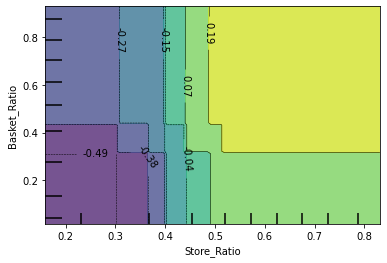

In [128]:
mc_clf = GradientBoostingClassifier(n_estimators=10,max_depth=1).fit(X, Y)
features=[(0,1)]
plot_partial_dependence(mc_clf, X, features, target=4) 

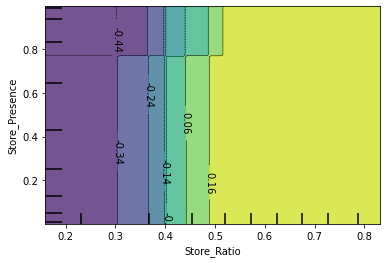

In [133]:
mc_clf = GradientBoostingClassifier(n_estimators=10,max_depth=1).fit(X, Y)
features=[(0,5)]
plot_partial_dependence(mc_clf, X, features, target=4) 

ValueError: Contour levels must be increasing

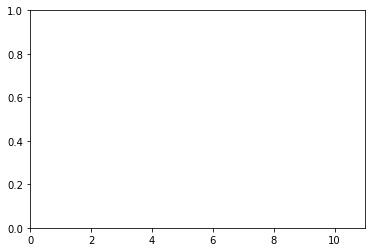

In [146]:
features=[(2,4)]
plot_partial_dependence(mc_clf, X, features, target=4) 

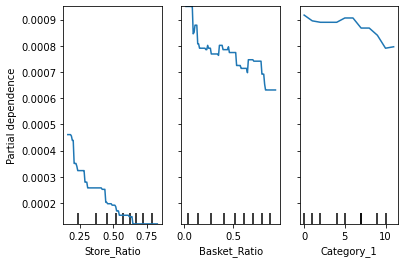

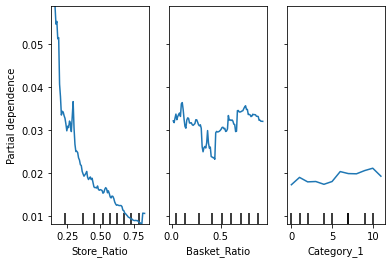

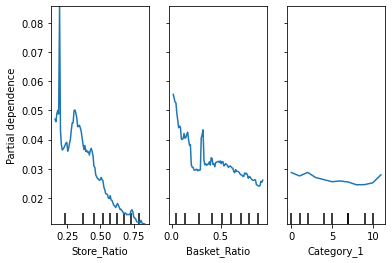

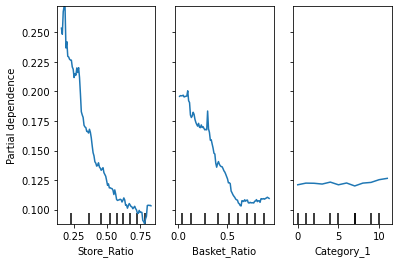

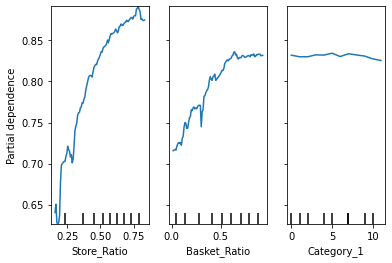

In [119]:
for i in [0,1,2,3,4]:
    
    features=[0,1,2]
    plot_partial_dependence(est, X, features, target=i) 

In [ ]:
store ratio is greater than 0.25 or not

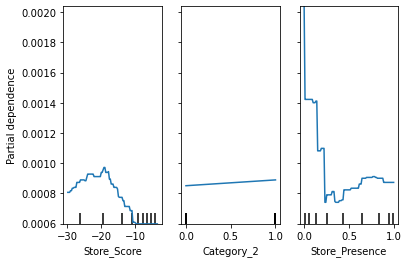

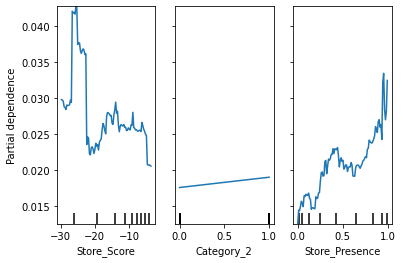

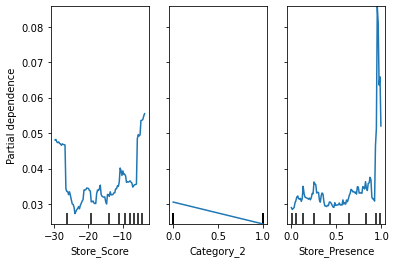

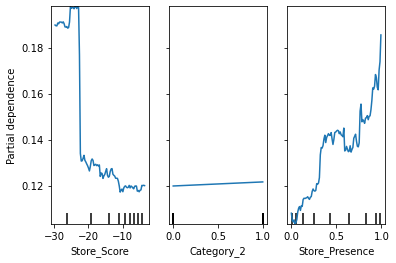

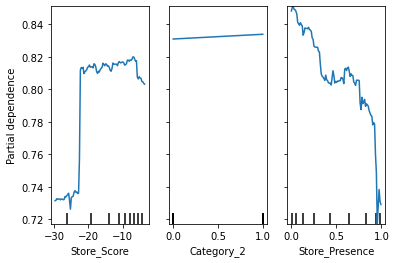

In [120]:
for i in [0,1,2,3,4]:
    
    features=[3,4,5]
    plot_partial_dependence(est, X, features, target=i) 

In [ ]:
store score -30 less or more

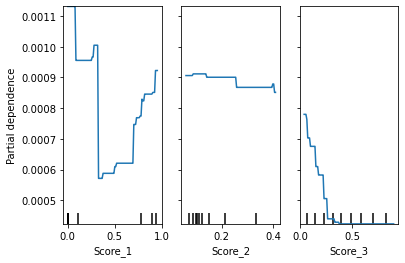

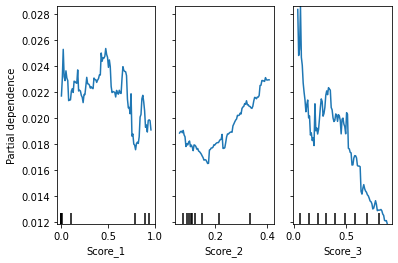

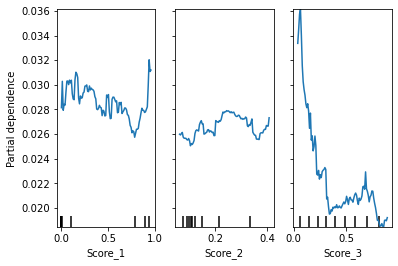

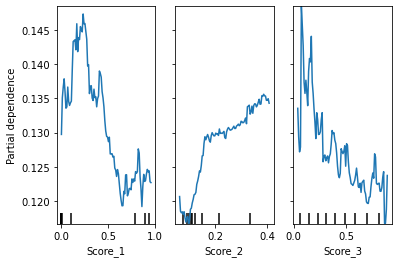

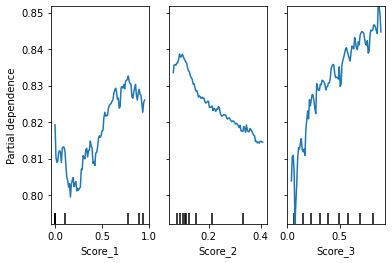

In [121]:
for i in [0,1,2,3,4]:
    
    features=[6,7,8]
    plot_partial_dependence(est, X, features, target=i) 

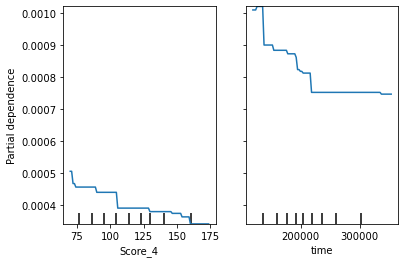

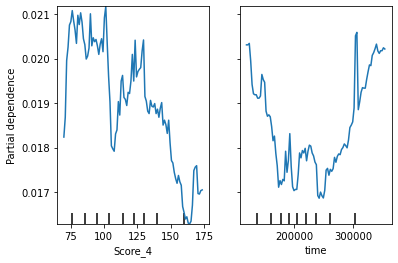

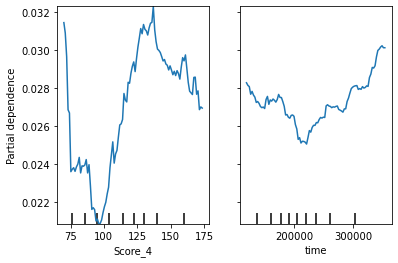

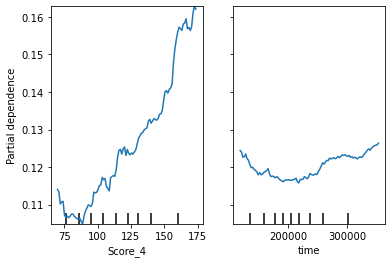

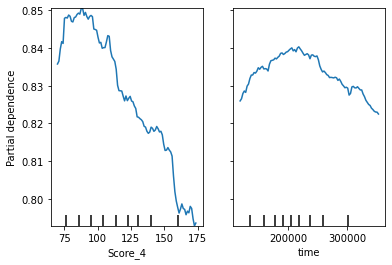

In [122]:
for i in [0,1,2,3,4]:
    
    features=[9,10]
    plot_partial_dependence(est, X, features, target=i) 

In [18]:
from sklearn.cluster import KMeans
inertias = [] 
mapping1 = {} 
mapping2 = {}
distortions=[]

for k in [3,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]:
        
    km = KMeans(n_clusters=k, random_state=10)
    cluster_labels = km.fit_predict(X)

    #silhouette_avg = silhouette_score((np.array(df['max_luminosity'])).reshape(-1,1), cluster_labels)
    #print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)
        
    distortions.append(sum(np.min(cdist(X, km.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(km.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, km.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = km.inertia_

NameError: name 'cdist' is not defined

In [ ]:
K =[3,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

In [ ]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

In [ ]:
for n_clusters in [3,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict((np.array(df['max_luminosity'])).reshape(-1,1))

    silhouette_avg = silhouette_score((np.array(df['max_luminosity'])).reshape(-1,1), cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

In [ ]:

# 6 may be a good value

from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
enc = KBinsDiscretizer(n_bins=11, encode='ordinal', strategy='kmeans')
enc.fit(np.array(X_train['max_luminosity']).reshape(-1,1))
X_train['max_luminosity_binned'] = enc.transform(np.array(X_train['max_luminosity']).reshape(-1,1))
X_valid['max_luminosity_binned'] = enc.transform(np.array(X_valid['max_luminosity']).reshape(-1,1))

In [ ]:
bureau_agg = cf.groupby('max_luminosity', as_index = False).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()
bureau_agg.head()

In [ ]:
columns = ['max_luminosity']

# Iterate through the variables names
for var in bureau_agg.columns.levels[0]:
    # Skip the id name
    if var != 'max_luminosity':
        
        # Iterate through the stat names
        for stat in bureau_agg.columns.levels[1][:-1]:
            # Make a new column name for the variable and stat
            columns.append('bureau_%s_%s' % (var, stat))

In [157]:
X.isnull().sum()

Store_Ratio          0
Basket_Ratio         0
Store_Score          0
Category_2           0
Store_Presence       0
Score_1              0
Score_2              0
Score_3              0
Score_4              0
time                 0
Category_1_target    0
dtype: int64

In [158]:


scaler = StandardScaler()
X_ = scaler.fit_transform(X)
X = pd.DataFrame(X_,columns=X.columns)

folds = StratifiedKFold(n_splits=5,shuffle=True ,random_state=42)

oof_preds = []
oof_scores = []

for i , (train_idx,test_idx) in enumerate(folds.split(X,Y)):
  train_set = (X.iloc[train_idx],Y.iloc[train_idx])
  test_set = (X.iloc[test_idx],Y.iloc[test_idx])

  model = LogisticRegression(max_iter=5000)
  model.fit(*train_set)

  preds = model.predict_proba(test_set[0])
  score = log_loss(test_set[1],preds)
  
  oof_pred_fold = model.predict_proba(scaler.transform(testenc))
  oof_preds.append(oof_pred_fold)

  print(score)
  oof_scores.append(score)

print("Mean OOF Score :",np.mean(oof_scores))
final_preds = np.mean(np.array(oof_preds),axis=0)

0.4903819147355476
0.47909217680132066
0.47455406976751996
0.4823978390715356
0.4713621245560893
Mean OOF Score : 0.4795576249864026


In [159]:
submission = pd.DataFrame(final_preds)
submission.to_csv("submission2.csv",index=None)
submission

,0,1,2,3,4
0,1.905569e-05,0.119209,0.227600,0.451384,0.201788
1,1.371278e-06,0.025509,0.229391,0.689487,0.055612
2,4.437751e-07,0.041419,0.389105,0.498392,0.071084
3,1.410181e-05,0.028069,0.195829,0.720468,0.055621
4,4.547590e-07,0.012361,0.171752,0.772046,0.043841
...,...,...,...,...,...
12135,2.277494e-04,0.102756,0.443689,0.290661,0.162667
12136,7.568394e-06,0.015359,0.140019,0.804933,0.039682
12137,1.993422e-06,0.022702,0.185973,0.728224,0.063099
12138,2.871868e-05,0.032204,0.262668,0.635431,0.069668
